# Curve fitting of COVID-19 cases of India

Created by (c) Shardav Bhatt on 18 May 2020


# 1. Introduction

Jupyter Notebook Created by Shardav Bhatt

Data reference: https://www.mohfw.gov.in/ (upto 18 May 2020)

In this notebook, I have considered data of COVID-19 cases in India to perform curve fitting on it. The graphs given data and fitted data are shown. Separate graphs of number of cases, number of deaths and number of recovered are shown for cummulative data as well as daily data. The curve fitting is in terms of polynomial fitting based on method of least square.

# 2. Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 3. Extracting data from file

In [2]:
data = pd.read_csv('data_18May.csv')
d = data.values
dates = d[:,0]
days = np.array(d[:,1],dtype='int16')
cummulative_cases = np.array(d[:,2], dtype='float64')
cummulative_deaths = np.array(d[:,3], dtype='float64')
cummulative_recovered = np.array(d[:,4], dtype='float64')

# 4. Generating daily data from the cummulative data

In [3]:
def daily_data (y):
  daily = [None]*len(y)
  daily[0] = y[0]
  for i in range(1,len(y)):
    daily[i] = y[i]-y[i-1]
  return np.array(daily)

daily_new_cases = daily_data(cummulative_cases)
daily_new_deaths = daily_data(cummulative_deaths)
daily_new_recovered = daily_data(cummulative_recovered)

# 5. Determining proportion of deaths and recovered cases

In [4]:
def proportion (x,y):
  prop = [None]*len(y)
  for i in range(len(y)):
    prop[i] = (y[i]/x[i])*100
  return np.array(prop)

prop_death = proportion (cummulative_cases, cummulative_deaths)
prop_recovered = proportion (cummulative_cases, cummulative_recovered)

# 6. Funtion to check best degreee of polynomial
Here I am trying different degrees of polynomial and checking accuracy of it using Mean Squared Error and $R^2$ score. I am trying polynomials upto degree 100 to check which degree is best.

In [5]:
def fit (x,y):
  for i in range (0,101,5):
    f = np.polyfit(x,y,deg=i)
    fval = np.polyval(f,x)
    print('Degree = %d \tMSE = %10.2f \t R^2 Score = %10.6f' %(i,mean_squared_error(y,fval),r2_score(y,fval)))

# 7. Function to plot data and fitted data

This function plots the given data and the fitted data. Given data is considered from the uploaded data file. Fitted data is generated using $n$ degree polynomial.

In [6]:
def my_plot(x,y,dates,n):
  f = np.polyfit(x,y,deg=n)
  fval = np.polyval(f,x)

  date_list = []
  pos = []
  for i in range(len(dates)):
    if i%5 == 0:
        date_list.append(str(dates[i]).split()[0])
        pos.append(i)

  plt.plot(y,'ro',markersize=2)
  plt.plot(fval,'g',linewidth=1)
  plt.xticks(ticks=pos, rotation='vertical',labels=date_list)
  plt.grid(which = 'both',axis='both')
  plt.text(days[-1],y[-1],str(int(y[-1])))
  plt.ylabel('Number of Cases')
  plt.legend(['Actual Data (https://www.mohfw.gov.in/)','Fitted curve'])
  if n == 1:
    print('\nFitted curve for degree %d is Y = %fx + %f\n' %(n,f[0],f[1]))
  elif n == 2:
    print('\nFitted curve for degree %d is Y = %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2]))
  elif n == 3:
    print('\nFitted curve for degree %d is Y = %fx^3 + %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2],f[3]))
  elif n == 4:
    print('\nFitted curve for degree %d is Y = %fx^4 + %fx^3 + %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2],f[3],f[4]))
  elif n == 5:
    print('\nFitted curve for degree %d is Y = %fx^5 + %fx^4 + %fx^3 + %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2],f[3],f[4],f[5]))
  else:
    pass

# 8. Analysis of Cummulative Cases
It can be observed that after first week of april, the rate of increament of the cases shoot up.

Degree = 0 	MSE = 694688282.20 	 R^2 Score =   0.000000
Degree = 5 	MSE =  204679.49 	 R^2 Score =   0.999705
Degree = 10 	MSE =   50694.11 	 R^2 Score =   0.999927
Degree = 15 	MSE =   24905.56 	 R^2 Score =   0.999964
Degree = 20 	MSE =   22069.13 	 R^2 Score =   0.999968
Degree = 25 	MSE =   15919.72 	 R^2 Score =   0.999977
Degree = 30 	MSE =   13510.57 	 R^2 Score =   0.999981
Degree = 35 	MSE =   13322.36 	 R^2 Score =   0.999981
Degree = 40 	MSE =   13289.69 	 R^2 Score =   0.999981
Degree = 45 	MSE =   12919.58 	 R^2 Score =   0.999981
Degree = 50 	MSE =   11473.24 	 R^2 Score =   0.999983
Degree = 55 	MSE =   11843.96 	 R^2 Score =   0.999983
Degree = 60 	MSE =   11153.84 	 R^2 Score =   0.999984
Degree = 65 	MSE =   11319.87 	 R^2 Score =   0.999984
Degree = 70 	MSE =   11175.98 	 R^2 Score =   0.999984
Degree = 75 	MSE =   11332.91 	 R^2 Score =   0.999984
Degree = 80 	MSE =   10751.05 	 R^2 Score =   0.999985
Degree = 85 	MSE =   10706.23 	 R^2 Score =   0.999985
Degree = 9

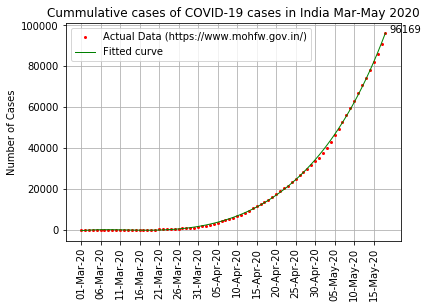

In [7]:
fit (days, cummulative_cases)
my_plot(days, cummulative_cases, dates, 5)
plt.title('Cummulative cases of COVID-19 cases in India Mar-May 2020')
plt.show()

# 9. Analysis of Cummulative deaths

Degree = 0 	MSE =  735262.38 	 R^2 Score =   0.000000
Degree = 5 	MSE =     799.40 	 R^2 Score =   0.998913
Degree = 10 	MSE =     144.84 	 R^2 Score =   0.999803
Degree = 15 	MSE =     124.81 	 R^2 Score =   0.999830
Degree = 20 	MSE =      84.04 	 R^2 Score =   0.999886
Degree = 25 	MSE =      72.83 	 R^2 Score =   0.999901
Degree = 30 	MSE =      72.59 	 R^2 Score =   0.999901
Degree = 35 	MSE =      72.00 	 R^2 Score =   0.999902
Degree = 40 	MSE =      72.15 	 R^2 Score =   0.999902
Degree = 45 	MSE =      65.76 	 R^2 Score =   0.999911
Degree = 50 	MSE =      65.33 	 R^2 Score =   0.999911
Degree = 55 	MSE =      59.96 	 R^2 Score =   0.999918
Degree = 60 	MSE =      39.79 	 R^2 Score =   0.999946
Degree = 65 	MSE =      40.27 	 R^2 Score =   0.999945
Degree = 70 	MSE =      38.04 	 R^2 Score =   0.999948
Degree = 75 	MSE =      34.93 	 R^2 Score =   0.999952
Degree = 80 	MSE =      30.72 	 R^2 Score =   0.999958
Degree = 85 	MSE =      30.63 	 R^2 Score =   0.999958
Degree = 90 

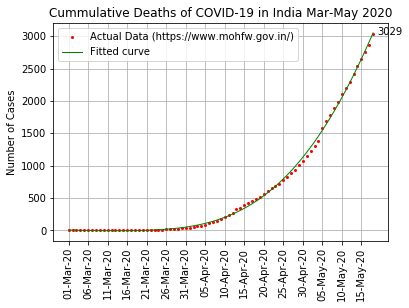

In [8]:
fit (days, cummulative_deaths)
my_plot(days, cummulative_deaths, dates, 5)
plt.title('Cummulative Deaths of COVID-19 in India Mar-May 2020')
plt.show()

# 10. Analysis of Cummulative Recovered cases

Degree = 0 	MSE = 81082867.74 	 R^2 Score =   0.000000
Degree = 5 	MSE =   62434.80 	 R^2 Score =   0.999230
Degree = 10 	MSE =   17604.19 	 R^2 Score =   0.999783
Degree = 15 	MSE =   12028.41 	 R^2 Score =   0.999852
Degree = 20 	MSE =    5989.76 	 R^2 Score =   0.999926
Degree = 25 	MSE =    3616.50 	 R^2 Score =   0.999955
Degree = 30 	MSE =    2747.54 	 R^2 Score =   0.999966
Degree = 35 	MSE =    2624.08 	 R^2 Score =   0.999968
Degree = 40 	MSE =    2625.92 	 R^2 Score =   0.999968
Degree = 45 	MSE =    2602.08 	 R^2 Score =   0.999968
Degree = 50 	MSE =    2596.31 	 R^2 Score =   0.999968
Degree = 55 	MSE =    2465.71 	 R^2 Score =   0.999970
Degree = 60 	MSE =    1941.83 	 R^2 Score =   0.999976
Degree = 65 	MSE =    2054.16 	 R^2 Score =   0.999975
Degree = 70 	MSE =    1743.59 	 R^2 Score =   0.999978
Degree = 75 	MSE =    1660.99 	 R^2 Score =   0.999980
Degree = 80 	MSE =    1663.99 	 R^2 Score =   0.999979
Degree = 85 	MSE =    1664.58 	 R^2 Score =   0.999979
Degree = 90

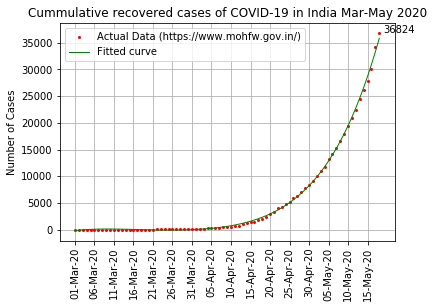

In [9]:
fit (days, cummulative_recovered)
my_plot(days, cummulative_recovered, dates, 5)
plt.title('Cummulative recovered cases of COVID-19 in India Mar-May 2020')
plt.show()

# 11. Analysis of daily new cases

Degree = 0 	MSE = 1967295.59 	 R^2 Score =   0.000000
Degree = 5 	MSE =   59203.81 	 R^2 Score =   0.969906
Degree = 10 	MSE =   39975.83 	 R^2 Score =   0.979680
Degree = 15 	MSE =   37220.38 	 R^2 Score =   0.981080
Degree = 20 	MSE =   33908.40 	 R^2 Score =   0.982764
Degree = 25 	MSE =   33327.42 	 R^2 Score =   0.983059
Degree = 30 	MSE =   32228.38 	 R^2 Score =   0.983618
Degree = 35 	MSE =   31259.41 	 R^2 Score =   0.984110
Degree = 40 	MSE =   30639.95 	 R^2 Score =   0.984425
Degree = 45 	MSE =   29203.98 	 R^2 Score =   0.985155
Degree = 50 	MSE =   29118.61 	 R^2 Score =   0.985199
Degree = 55 	MSE =   28952.25 	 R^2 Score =   0.985283
Degree = 60 	MSE =   28601.24 	 R^2 Score =   0.985462
Degree = 65 	MSE =   28600.37 	 R^2 Score =   0.985462
Degree = 70 	MSE =   28546.84 	 R^2 Score =   0.985489
Degree = 75 	MSE =   28383.03 	 R^2 Score =   0.985573
Degree = 80 	MSE =   27818.68 	 R^2 Score =   0.985859
Degree = 85 	MSE =   27857.51 	 R^2 Score =   0.985840
Degree = 90 

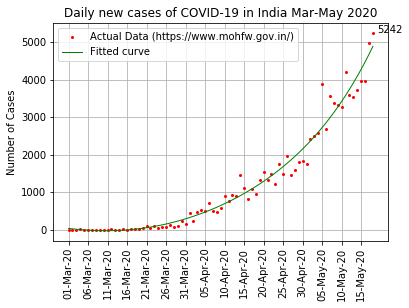

In [10]:
fit (days, daily_new_cases)
my_plot (days, daily_new_cases, dates, 5)
plt.title('Daily new cases of COVID-19 in India Mar-May 2020')
plt.show()

# 12. Analysis of daily new deaths

Degree = 0 	MSE =    1984.91 	 R^2 Score =  -0.000000
Degree = 5 	MSE =     218.60 	 R^2 Score =   0.889868
Degree = 10 	MSE =     169.38 	 R^2 Score =   0.914667
Degree = 15 	MSE =     159.46 	 R^2 Score =   0.919665
Degree = 20 	MSE =     142.47 	 R^2 Score =   0.928222
Degree = 25 	MSE =     139.85 	 R^2 Score =   0.929543
Degree = 30 	MSE =     139.72 	 R^2 Score =   0.929607
Degree = 35 	MSE =     139.24 	 R^2 Score =   0.929848
Degree = 40 	MSE =     137.87 	 R^2 Score =   0.930542
Degree = 45 	MSE =     137.58 	 R^2 Score =   0.930685
Degree = 50 	MSE =     119.32 	 R^2 Score =   0.939888
Degree = 55 	MSE =     107.17 	 R^2 Score =   0.946010
Degree = 60 	MSE =     102.83 	 R^2 Score =   0.948195
Degree = 65 	MSE =     103.00 	 R^2 Score =   0.948109
Degree = 70 	MSE =      90.67 	 R^2 Score =   0.954320
Degree = 75 	MSE =      87.15 	 R^2 Score =   0.956092
Degree = 80 	MSE =      85.80 	 R^2 Score =   0.956775
Degree = 85 	MSE =      85.86 	 R^2 Score =   0.956743
Degree = 90 

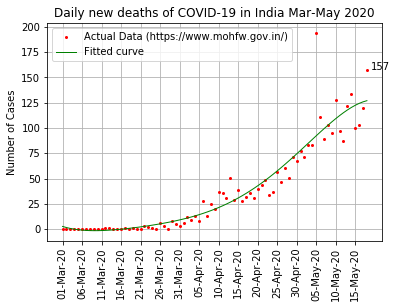

In [11]:
fit (days, daily_new_deaths)
my_plot (days, daily_new_deaths, dates, 5)
plt.title('Daily new deaths of COVID-19 in India Mar-May 2020')
plt.show()

# 13. Analysis of daily new recovered

Degree = 0 	MSE =  535248.95 	 R^2 Score =   0.000000
Degree = 5 	MSE =   33396.64 	 R^2 Score =   0.937605
Degree = 10 	MSE =   30283.06 	 R^2 Score =   0.943422
Degree = 15 	MSE =   22077.98 	 R^2 Score =   0.958752
Degree = 20 	MSE =    8291.52 	 R^2 Score =   0.984509
Degree = 25 	MSE =    6395.73 	 R^2 Score =   0.988051
Degree = 30 	MSE =    5547.73 	 R^2 Score =   0.989635
Degree = 35 	MSE =    5539.86 	 R^2 Score =   0.989650
Degree = 40 	MSE =    5541.62 	 R^2 Score =   0.989647
Degree = 45 	MSE =    5534.33 	 R^2 Score =   0.989660
Degree = 50 	MSE =    5135.87 	 R^2 Score =   0.990405
Degree = 55 	MSE =    4923.15 	 R^2 Score =   0.990802
Degree = 60 	MSE =    4912.82 	 R^2 Score =   0.990821
Degree = 65 	MSE =    4818.64 	 R^2 Score =   0.990997
Degree = 70 	MSE =    4407.30 	 R^2 Score =   0.991766
Degree = 75 	MSE =    4414.63 	 R^2 Score =   0.991752
Degree = 80 	MSE =    4410.18 	 R^2 Score =   0.991761
Degree = 85 	MSE =    4412.20 	 R^2 Score =   0.991757
Degree = 90 

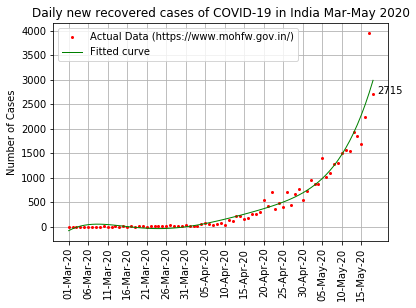

In [12]:
fit (days, daily_new_recovered)
my_plot (days, daily_new_recovered, dates, 5)
plt.title('Daily new recovered cases of COVID-19 in India Mar-May 2020')
plt.show()

# 14. Comparison of proportions of deaths and recovered cases

We can observe that Recovery rate has begun to increase since mid april. Death rate is still constant around 3 and slightly decreasing. These are good signs.

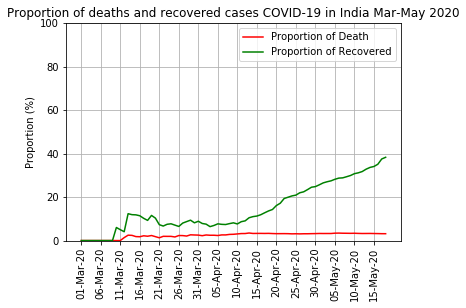

In [13]:
date_list = []
pos = []
for i in range(len(dates)):
  if i%5==0:
      date_list.append(str(dates[i]).split()[0])
      pos.append(i)

plt.plot(prop_death, 'r')
plt.plot(prop_recovered, 'g')
plt.legend(['Proportion of Death','Proportion of Recovered'])
plt.ylabel('Proportion (%)')
plt.grid(which='both',axis='both')
plt.ylim([0,100])
plt.title('Proportion of deaths and recovered cases COVID-19 in India Mar-May 2020')
plt.xticks(ticks=pos, rotation='vertical',labels=date_list)
plt.show()